In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check matplotlib version

matplotlib.__version__

'3.7.0'

In [3]:
# Ensure charts are displayed without having to call them specifically

%matplotlib inline

In [4]:
path = r"C:\Users\harip\Dairy data Analysis"

In [5]:
# Importing the dataset
df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'Cleaned_data.csv'), index_col = 0)

In [6]:
df.head()

,States,Total Land Area (acres),Number of Cows,Farm Size per sq.km,Date recording date,Product ID,Product Name,Brand,Quantity (liters/kg),Prices,...,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales categories,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year of recording data
0,Telangana,310.84,96,Medium,17/02/2022,5,Ice Cream,Dodla Dairy,222.40,85.72,...,21/01/2022,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03,2022
1,Uttar Pradesh,19.19,44,Large,01/12/2021,1,Milk,Amul,687.48,42.61,...,25/10/2021,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10,2021
2,Tamil Nadu,581.69,24,Medium,28/02/2022,4,Yogurt,Dodla Dairy,503.48,36.50,...,13/02/2022,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83,2022
3,Telangana,908.00,89,Small,09/06/2019,3,Cheese,Britannia Industries,823.36,26.52,...,26/07/2019,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68,2019
4,Maharashtra,861.95,21,Medium,14/12/2020,8,Buttermilk,Mother Dairy,147.77,83.85,...,28/10/2020,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40,2020


In [7]:
# Checking for Mixed data type
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

In [8]:
weird

0       False
1       False
2       False
3       False
4       False
        ...  
4320    False
4321    False
4322    False
4323    False
4324    False
Length: 4325, dtype: bool

No mixed type of data.

# Exploring Relationships

In [9]:
# Creating correlation matrix 

df.corr()

C:\Users\harip\AppData\Local\Temp\ipykernel_10772\855236651.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Prices,Total Value of products available,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year of recording data
Total Land Area (acres),1.000000,-0.009594,-0.007625,-0.001347,0.016962,0.005465,0.001420,-0.036948,0.013565,-0.015278,0.034161,0.010940,0.013727,-0.013386
Number of Cows,-0.009594,1.000000,0.010013,-0.004254,-0.006305,-0.009648,0.008068,0.010915,-0.006916,0.003461,-0.016088,0.002971,0.028728,-0.001923
Product ID,-0.007625,0.010013,1.000000,-0.027615,0.002351,-0.014582,0.202143,-0.021157,0.000731,-0.013642,-0.015158,-0.004781,-0.002916,-0.024529
Quantity (liters/kg),-0.001347,-0.004254,-0.027615,1.000000,-0.009435,0.724271,-0.006464,0.642613,-0.008217,0.516351,0.668622,-0.010437,0.003137,0.007276
Prices,0.016962,-0.006305,0.002351,-0.009435,1.000000,0.589694,0.001463,-0.002010,0.993908,0.437296,-0.010231,0.012188,0.007884,0.019576
Total Value of products available,0.005465,-0.009648,-0.014582,0.724271,0.589694,1.000000,-0.007832,0.467164,0.587408,0.722016,0.482579,0.007829,0.002148,0.020139
Shelf Life (days),0.001420,0.008068,0.202143,-0.006464,0.001463,-0.007832,1.000000,-0.001814,0.000156,-0.008105,-0.006592,-0.012949,-0.020754,-0.005710
Quantity Sold (liters/kg),-0.036948,0.010915,-0.021157,0.642613,-0.002010,0.467164,-0.001814,1.000000,-0.001789,0.809062,-0.140076,-0.008755,0.006344,-0.004653
Price per Unit (sold),0.013565,-0.006916,0.000731,-0.008217,0.993908,0.587408,0.000156,-0.001789,1.000000,0.440795,-0.008874,0.013941,0.005610,0.019421
Approx. Total Revenue(INR),-0.015278,0.003461,-0.013642,0.516351,0.437296,0.722016,-0.008105,0.809062,0.440795,1.000000,-0.117933,0.000206,-0.000698,0.001811


In [10]:
df.columns

Index(['States', 'Total Land Area (acres)', 'Number of Cows',
       'Farm Size per sq.km', 'Date recording date', 'Product ID',
       'Product Name', 'Brand', 'Quantity (liters/kg)', 'Prices',
       'Total Value of products available', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales categories',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)', 'Year of recording data'],
      dtype='object')

# Creating a subset for the Exploratory visual analysis

In [11]:
# Renaming prices column to "Overall prices"
df.rename(columns={'Prices': 'Overall Prices'}, inplace = True)

In [12]:
#Creating the subset
df_new= df[['Total Land Area (acres)','Number of Cows','Quantity (liters/kg)','Overall Prices','Total Value of products available','Shelf Life (days)','Quantity Sold (liters/kg)', 'Price per Unit (sold)','Approx. Total Revenue(INR)','Quantity in Stock (liters/kg)','Minimum Stock Threshold (liters/kg)', 'Reorder Quantity (liters/kg)']]

In [13]:
df_new.head()

,Total Land Area (acres),Number of Cows,Quantity (liters/kg),Overall Prices,Total Value of products available,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,310.84,96,222.40,85.72,19064.1280,25,7,82.24,575.68,215,19.55,64.03
1,19.19,44,687.48,42.61,29293.5228,22,558,39.24,21895.92,129,43.17,181.10
2,581.69,24,503.48,36.50,18377.0200,30,256,33.81,8655.36,247,15.10,140.83
3,908.00,89,823.36,26.52,21835.5072,72,601,28.92,17380.92,222,74.50,57.68
4,861.95,21,147.77,83.85,12390.5145,11,145,83.07,12045.15,2,76.02,33.40


## Correlation Heatmap

In [14]:
# Determining the correlation matrix
df_new.corr()

,Total Land Area (acres),Number of Cows,Quantity (liters/kg),Overall Prices,Total Value of products available,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
Total Land Area (acres),1.000000,-0.009594,-0.001347,0.016962,0.005465,0.001420,-0.036948,0.013565,-0.015278,0.034161,0.010940,0.013727
Number of Cows,-0.009594,1.000000,-0.004254,-0.006305,-0.009648,0.008068,0.010915,-0.006916,0.003461,-0.016088,0.002971,0.028728
Quantity (liters/kg),-0.001347,-0.004254,1.000000,-0.009435,0.724271,-0.006464,0.642613,-0.008217,0.516351,0.668622,-0.010437,0.003137
Overall Prices,0.016962,-0.006305,-0.009435,1.000000,0.589694,0.001463,-0.002010,0.993908,0.437296,-0.010231,0.012188,0.007884
Total Value of products available,0.005465,-0.009648,0.724271,0.589694,1.000000,-0.007832,0.467164,0.587408,0.722016,0.482579,0.007829,0.002148
Shelf Life (days),0.001420,0.008068,-0.006464,0.001463,-0.007832,1.000000,-0.001814,0.000156,-0.008105,-0.006592,-0.012949,-0.020754
Quantity Sold (liters/kg),-0.036948,0.010915,0.642613,-0.002010,0.467164,-0.001814,1.000000,-0.001789,0.809062,-0.140076,-0.008755,0.006344
Price per Unit (sold),0.013565,-0.006916,-0.008217,0.993908,0.587408,0.000156,-0.001789,1.000000,0.440795,-0.008874,0.013941,0.005610
Approx. Total Revenue(INR),-0.015278,0.003461,0.516351,0.437296,0.722016,-0.008105,0.809062,0.440795,1.000000,-0.117933,0.000206,-0.000698
Quantity in Stock (liters/kg),0.034161,-0.016088,0.668622,-0.010231,0.482579,-0.006592,-0.140076,-0.008874,-0.117933,1.000000,-0.005023,-0.002138


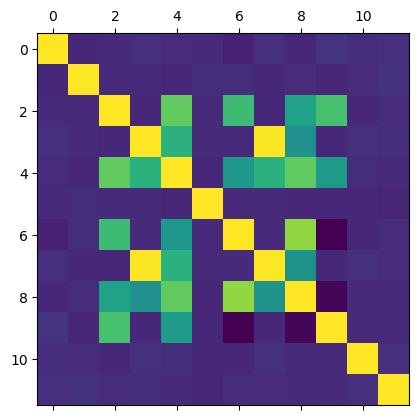

In [15]:
plt.matshow(df_new.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

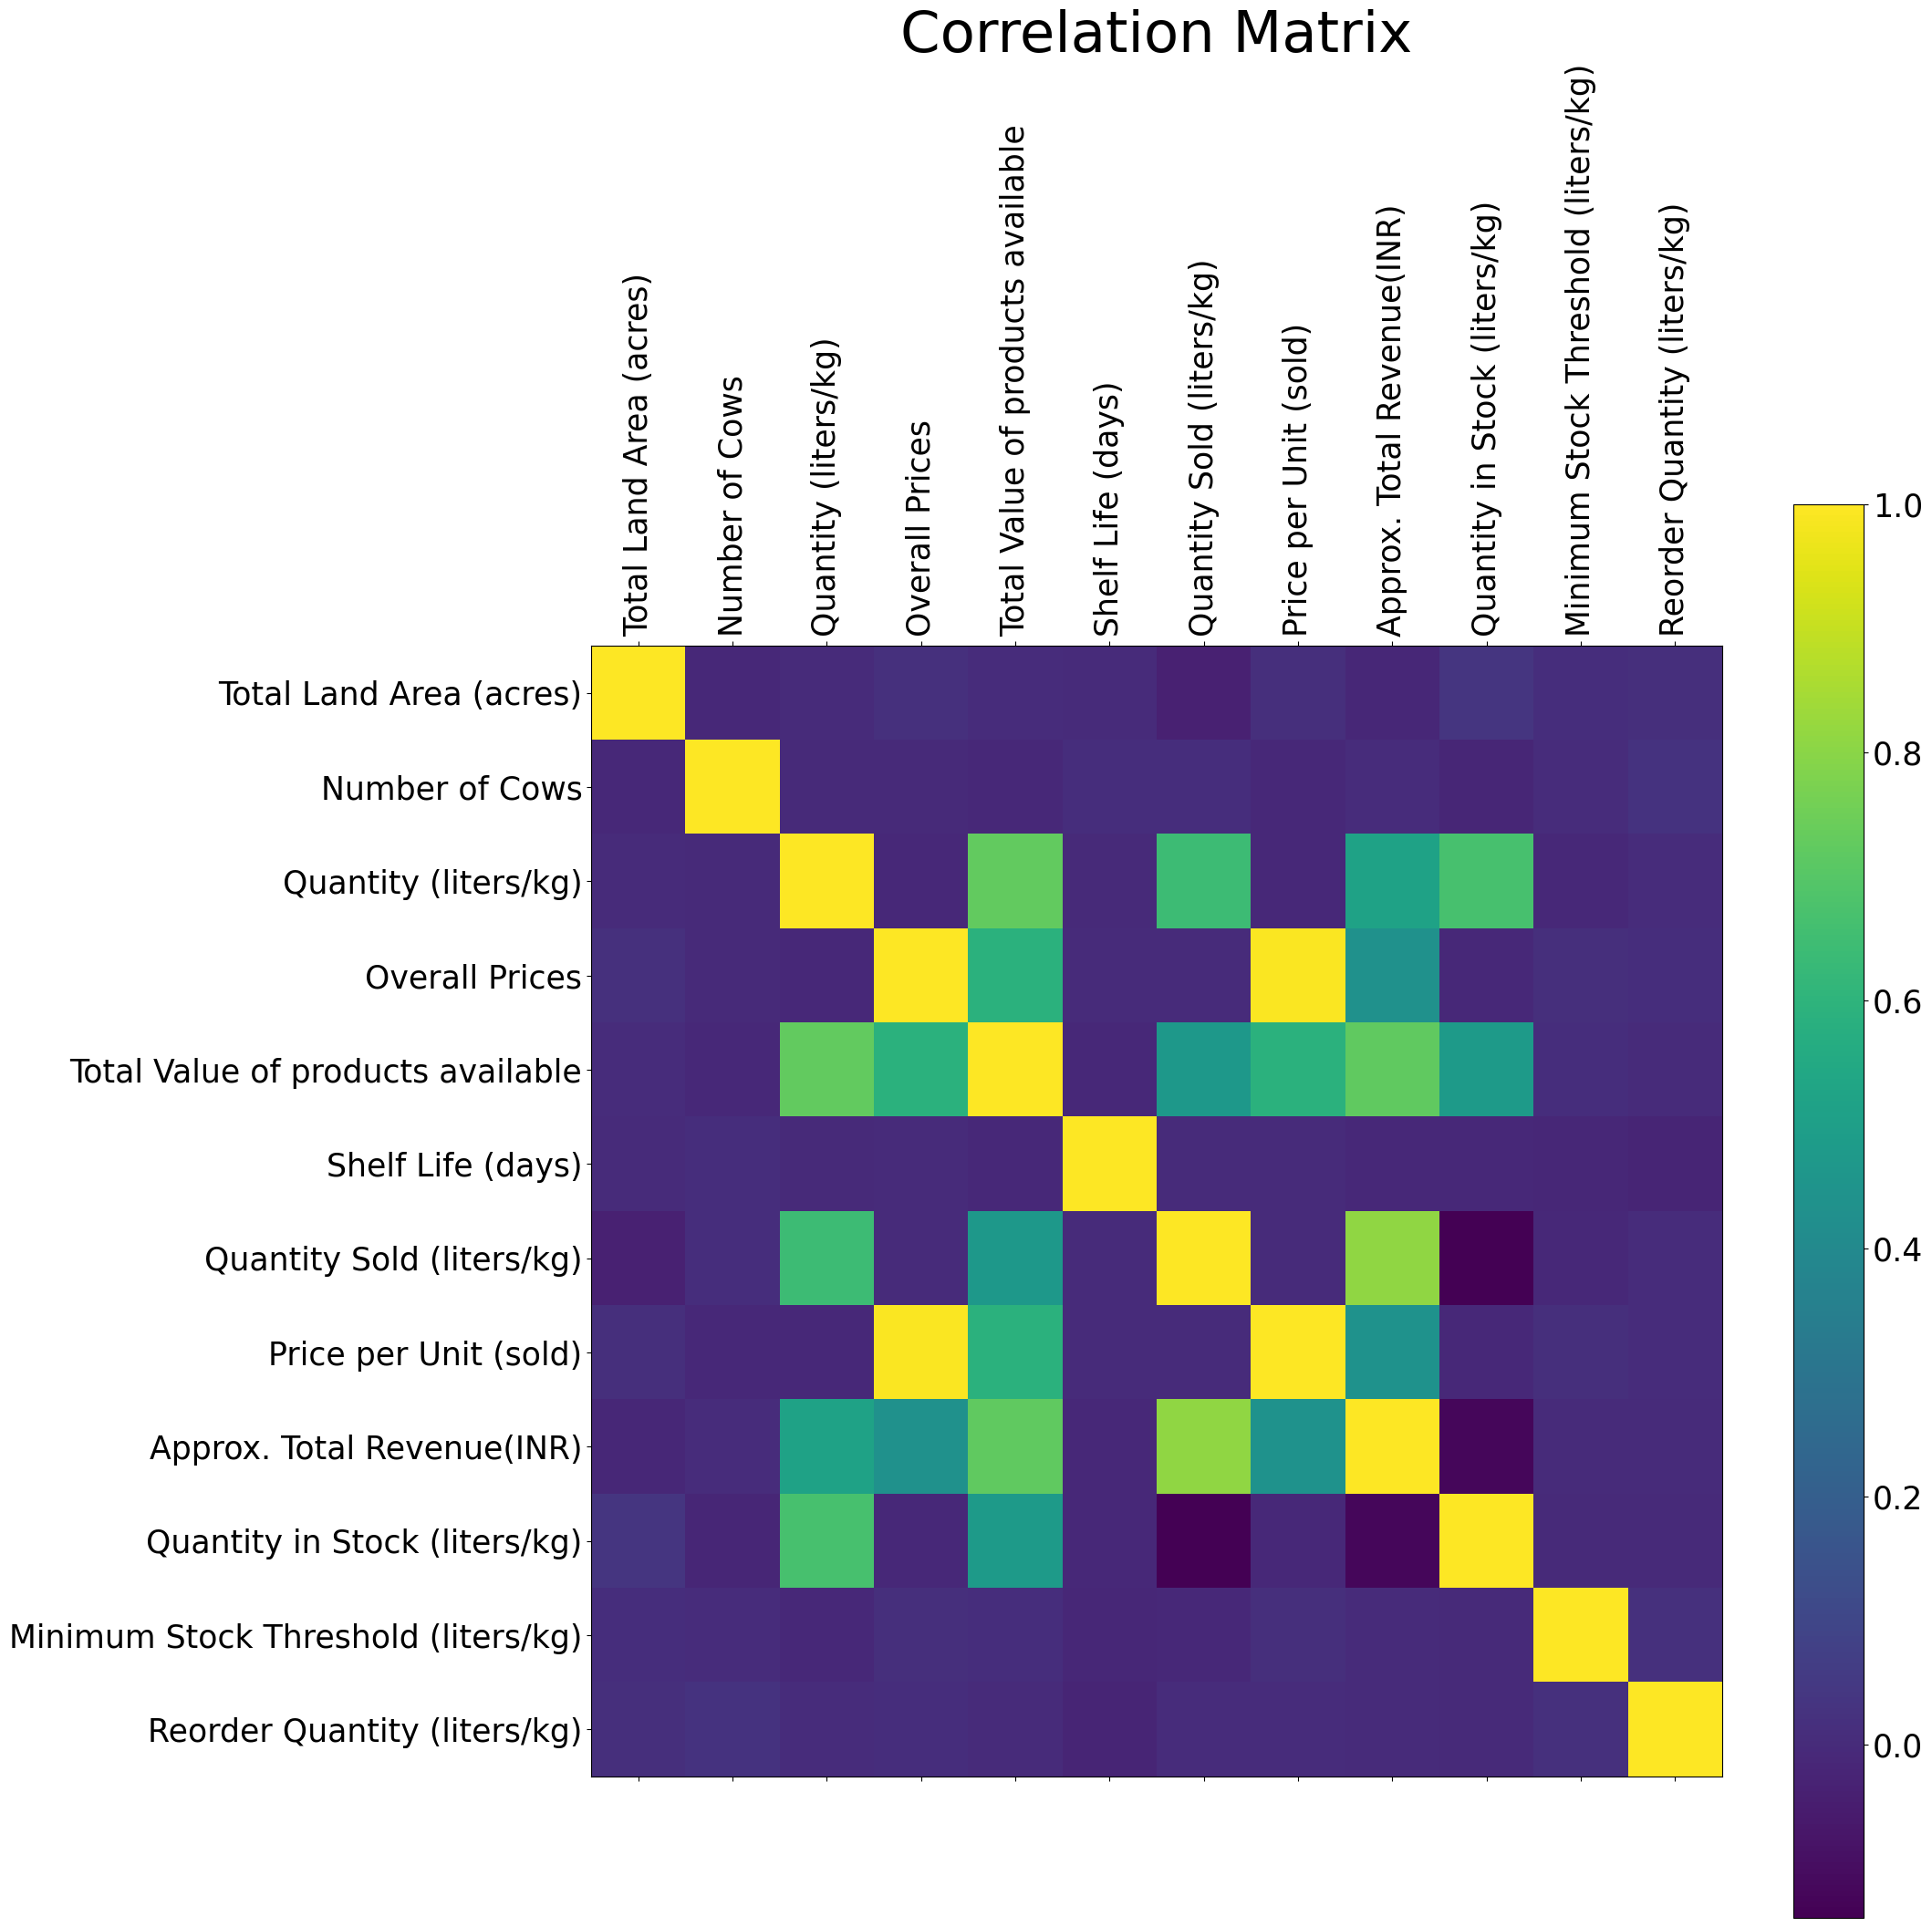

In [16]:
# Creating a correlation heatmap

f = plt.figure(figsize=(20,20)) # figure size 
plt.matshow(df_new.corr(), fignum = f.number) # type of plot for correlation
plt.xticks(range(df_new.shape[1]), df_new.columns, fontsize=25, rotation= 90) # x axis labels
plt.yticks(range(df_new.shape[1]), df_new.columns, fontsize=25) # y axis labels
cb = plt.colorbar() # Color legend
cb.ax.tick_params(labelsize=25) # add font size
plt.title('Correlation Matrix', fontsize=45) # adding title

This chart is not that clear for correlation as some values are missing, so now I am creating the heatmap with Seaborn

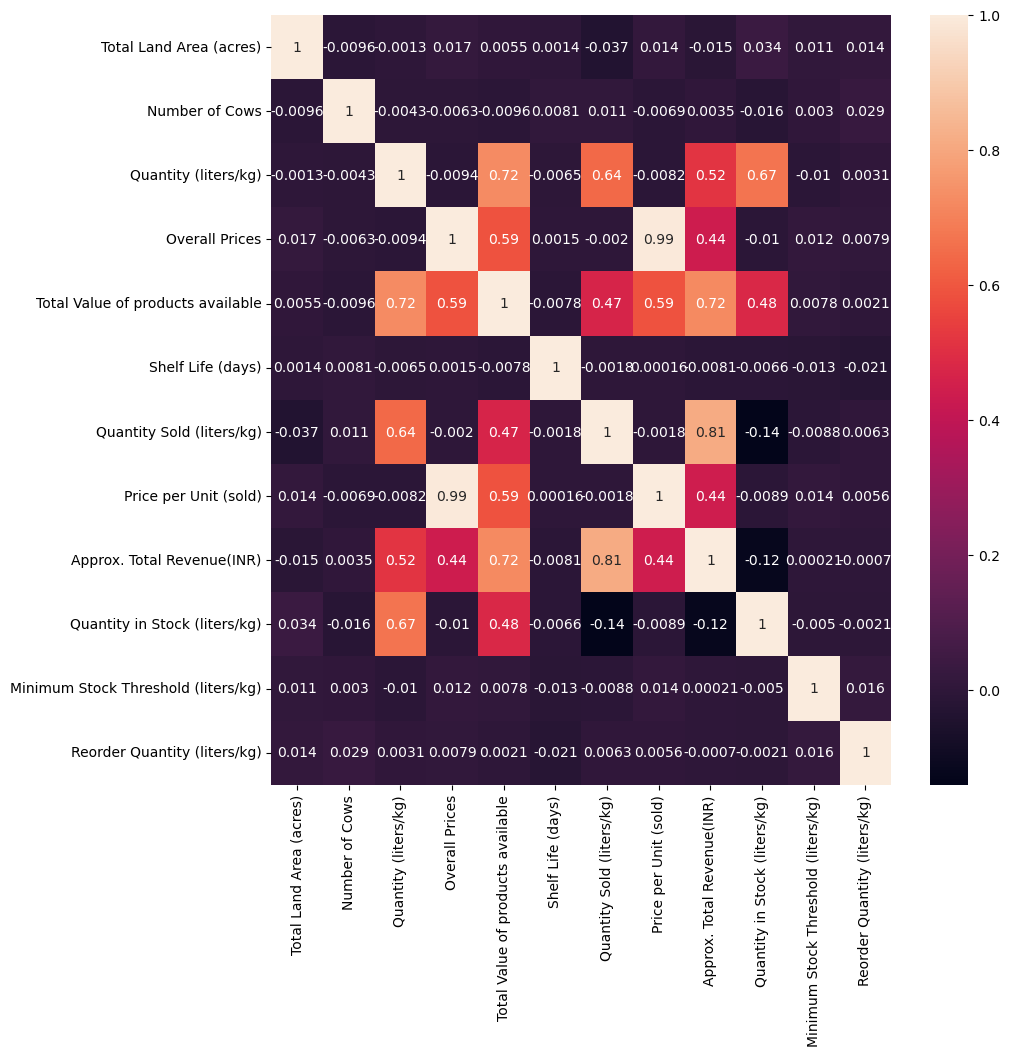

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_new.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

According to the heat map,
The relationship between the variables are represented by following colors;
* Very strong : Light orange
* Fairly strong : Orange
* Moderate: Red
* Weak : Purple
* No relationship : Black

The relationship categorised based on columns;

### Total Land areas
There is no significant relationship seen

### No of cows
No relationship seen

### Quantity(liters/kg)
* Strong relationship: Total value of products available, Quantity sold, Quantity in stock (liters/kg), Approx total revenue.

### Overall Prices
* Very strong: Price per unit sold
* Strong relationship: Total values of products available
* Moderate Relationship: Approx total revenue

### Total values of products available
* Very strong relationship: Quantity (liters/kg), Approx total revenue
* Strong relationship: Overall Prices, Prices per unit sold
* Moderate Relationship: Quantities sold (liters/kg), Quantities in stock

### Shelf Life
There is no significant relationship seen

### Quantities sold (liters/kg)
* Strong relationship: Approx total revenue, Quantities(literes/kg)
* Moderate Relationship: Total values of products available

### Prices per unit
* Very strong: Overall prices
* Strong relationship: Total values of products available
* Moderate Relationship: Approx total revenue

### Approx total revenue in INR
* Very strong: Quantities sold (liters/kg)
* Strong relationship: Total values of products available, Quantities (liters/kg)
* Moderate Relationship: Overall prices, Prices per unit sold

### Quantities in stock
* Strong relationship: Quantities (liters/kg)
* Moderate Relationship: Total values of products available

### Minimum stock threshold
There is no significant relationship seen

### Reorder Quantity
There is no significant relationship seen

Based on the heatmap 
I think the following relationships will be promising for the analysis;
* Overall prices and Price per Unit (sold)
* Total values of product and Quantities( litres/kg)
* Total values of product and Approx total revenue
* Approx total revenue and Quantities sold
* Quantites sold and Quantities(liters/kg)
* Total values of products and Overall prices
* Quantites in stock and Quantities(litres/kg)

# Scatterplots

## Overall prices and Price per unit sold

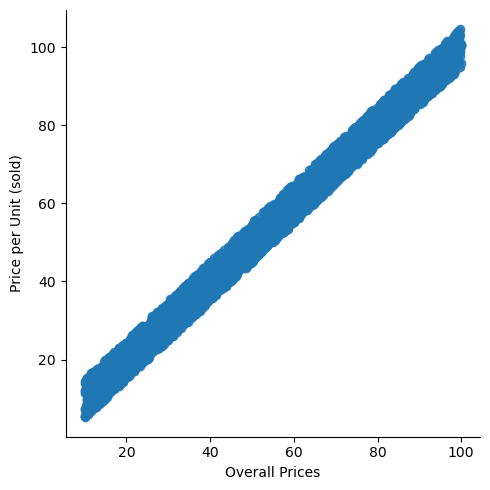

In [18]:
scatter_1= sns.lmplot(x = 'Overall Prices', y = 'Price per Unit (sold)', data = df_new)

The Scatterplot is showing a upward trend and the plots are very bound to the trend line which shows a Linear trend and strong relationship between the two variables.

## Total value of products available and Quantity( litres/kg)

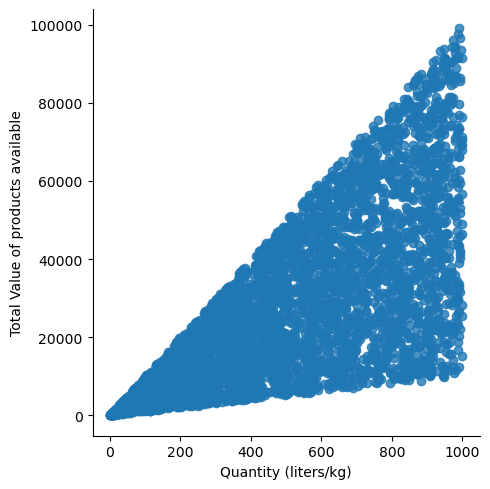

In [19]:
Scatter_2 = sns.lmplot(x = 'Quantity (liters/kg)', y = 'Total Value of products available', data = df_new)

The Scatterplot above shows a upward trend with the plots closely bound to the trend line and there are some outliers which is creating a triangle shape of the chart. As, there is lot of outliers present in the chart it shows a weak linear relationship between Quantity (litres/kg) and the total value od products available. 
This may be because there are different categories of milk products.

## Total values of product and Approx total revenue

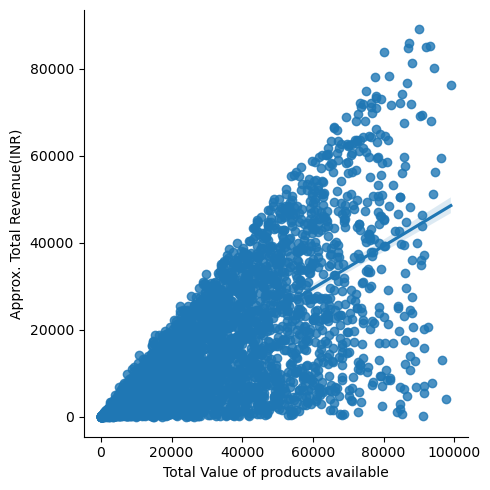

In [20]:
Scatter_3= sns.lmplot(x = 'Total Value of products available', y = 'Approx. Total Revenue(INR)', data = df_new)

The chart shows a upward trend of the line with closely bound plots in the both left side of the chart. There are many outliers seen which is even far fom the trend lin. But still seeing the very closely attached plots it seems to have a moderate linear relationship between the Total value of products available and approx total revenue (INR).

## Approx total revenue and Quantities sold

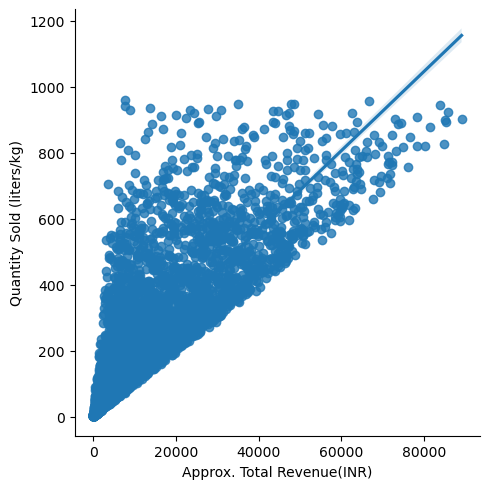

In [21]:
Scatter_4 = sns.lmplot(x = 'Approx. Total Revenue(INR)', y = 'Quantity Sold (liters/kg)', data = df)

This scatterplot shows a staright upward trend with most of the plots very closely bound to the trend line. This shows a Strong linear relationship between the total revenue and the quantity sold.

## Quantites sold and Quantities(liters/kg)

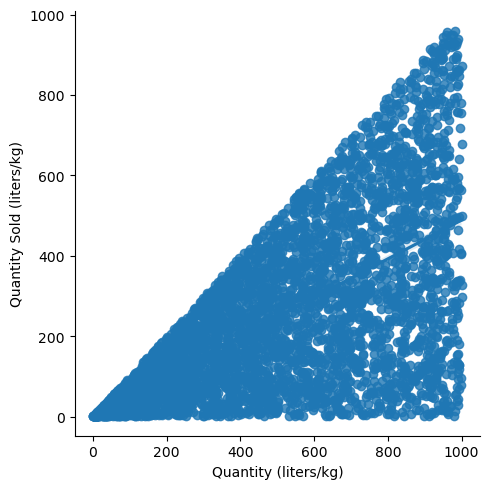

In [22]:
Scatter_5 = sns.lmplot(x = 'Quantity (liters/kg)', y = 'Quantity Sold (liters/kg)', data = df)

This scatterplot shows a Moderate linear relationship as the the trend line shows upward direction but there are many outliers present.

## Total values of products and Overall prices

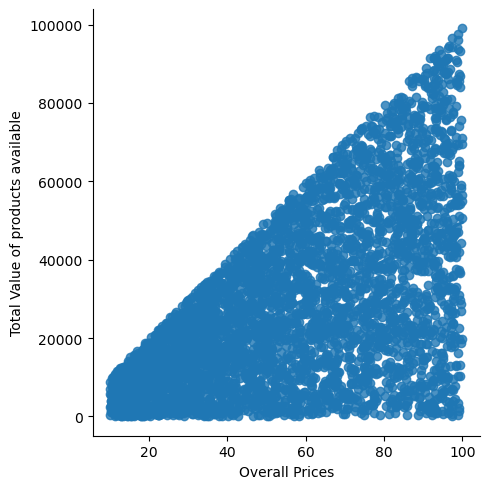

In [23]:
Scatter_6 = sns.lmplot(x = 'Overall Prices', y = 'Total Value of products available', data = df_new)

It is similar to the above chart, despite the trend line is showing upward trend there are many outliers moderate relationship between the prices and the total values of products.

## Quantites in stock and Quantities(litres/kg)

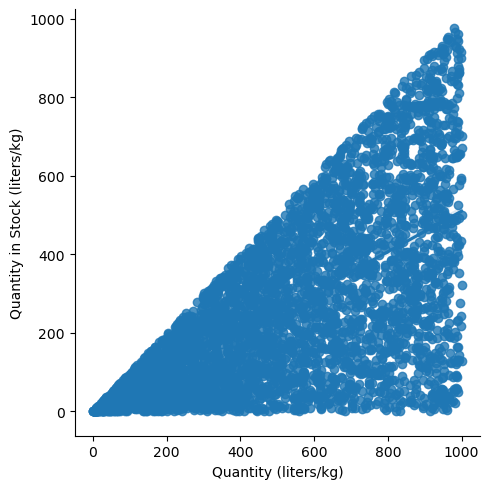

In [24]:
Scatter_7 = sns.lmplot(x = 'Quantity (liters/kg)', y = 'Quantity in Stock (liters/kg)', data = df)

It is similar to the above chart, despite the trend line is showing upward trend there are many outliers which shows a moderate relationship between the variables.

### Summary of scatterplots

* Overall prices and Price per Unit (sold) = Strong linear relatonship 
* Total values of product and Quantities( litres/kg) = Weak relationship
* Total values of product and Approx total revenue = Moderate relationship
* Approx total revenue and Quantities sold = Strong relationship
* Quantites sold and Quantities(liters/kg) = Moderate relationship
* Total values of products and Overall prices = Moderate relationship
* Quantites in stock and Quantities(litres/kg) = Moderate relationship

# Pair plots

In [25]:
# Creating a subset
sub= df_new[['Overall Prices', 'Total Value of products available','Quantity (liters/kg)','Quantity Sold (liters/kg)',
       'Price per Unit (sold)', 'Approx. Total Revenue(INR)','Quantity in Stock (liters/kg)']]

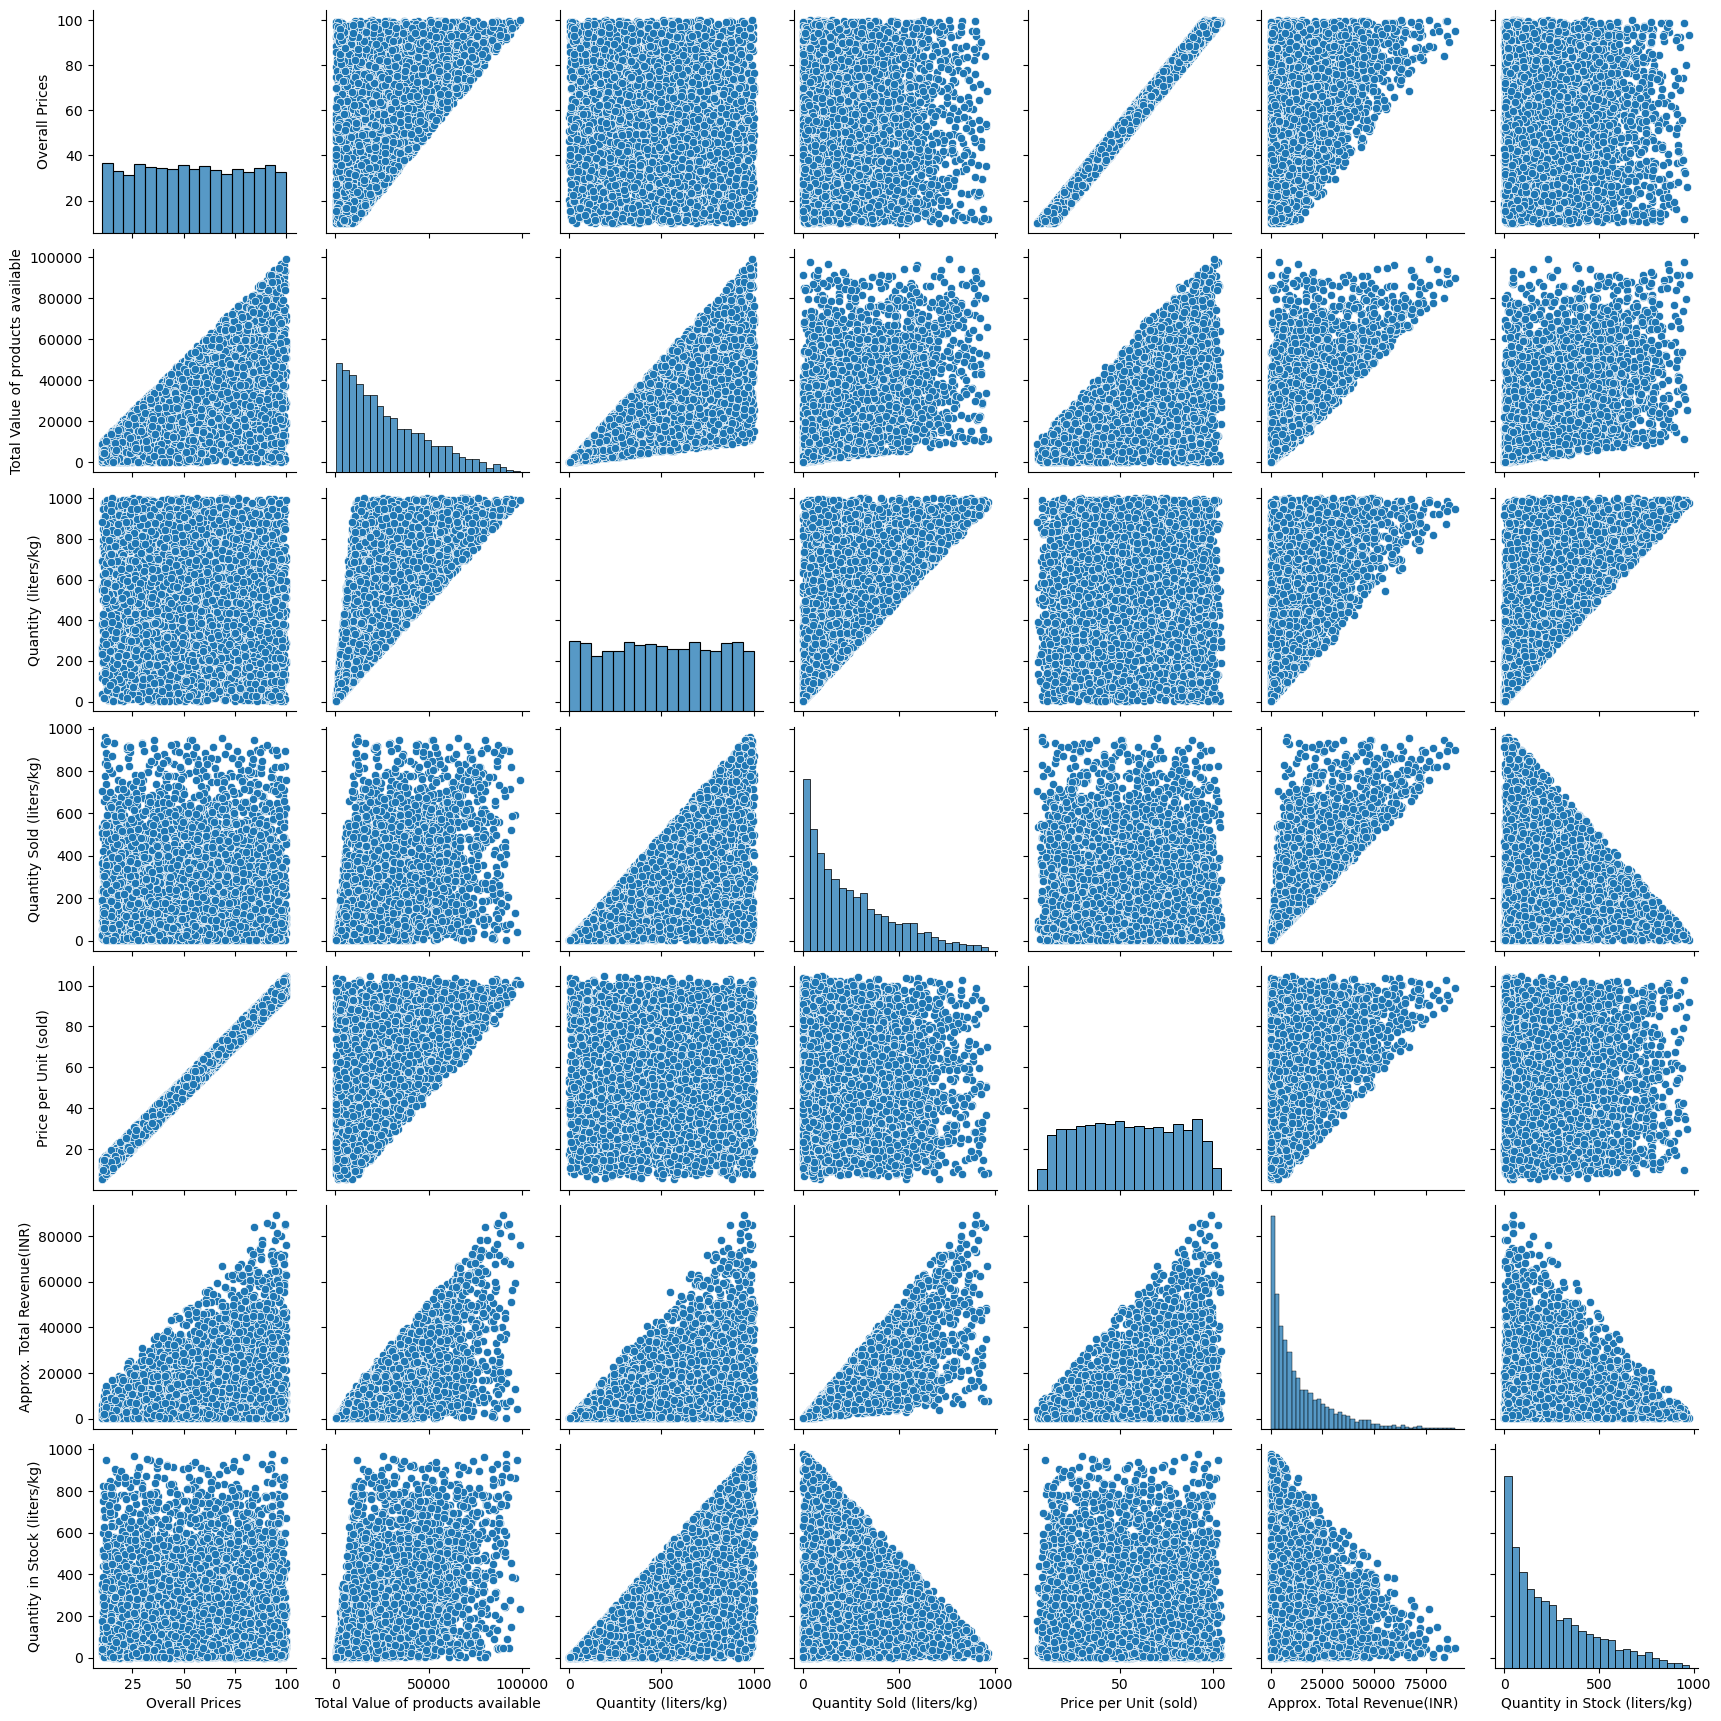

In [26]:
# Creating the pair plots
pair_plots= sns.pairplot(sub)

From the pair plots for all the columns, the relationships which we detremined from the scatterplots has been verified. For the further investigations creating s categorical plots to interprest the results.

# Catogorical plots

From the above analysis that the price per unit sold has the strong correlation with the overall prices. So, I am creating a categorical plot for the Approx. total revenue to determine the sales market.

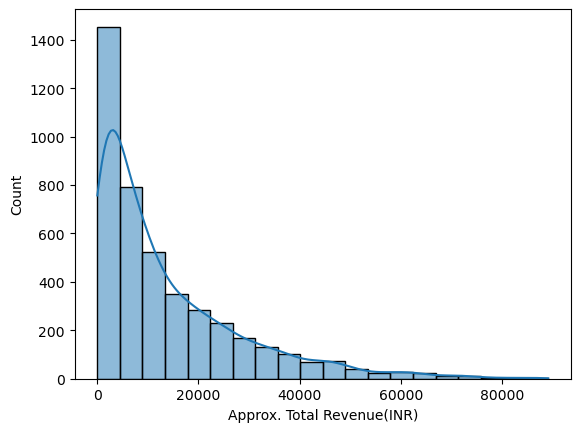

In [27]:
# Creating histogram
histogram_1 = sns.histplot(sub['Approx. Total Revenue(INR)'], bins = 20, kde = True)

### Creating categories

* Less than 20000 - Low sales
* 20000 - 60000 - Moderate sales
* Above 60000 - High sales

In [28]:
# Creating a sales flag

df.loc[df['Approx. Total Revenue(INR)'] < 20000, 'Sales'] = 'Low Sales'
df.loc[(df['Approx. Total Revenue(INR)'] >= 20000) & (df['Approx. Total Revenue(INR)'] < 60000), 'Sales'] = 'Moderate Sales'
df.loc[df['Approx. Total Revenue(INR)'] >= 60000, 'Sales'] = 'High Sales'

In [29]:
df['Sales'].value_counts()

Low Sales         3283
Moderate Sales     972
High Sales          70
Name: Sales, dtype: int64

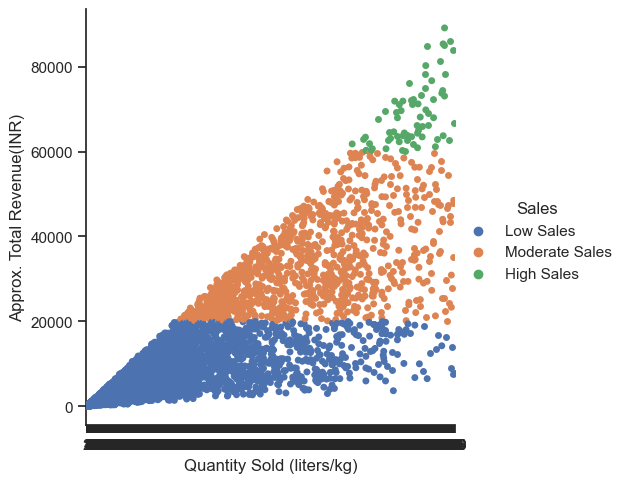

In [30]:
# Create a categorical plot in seaborn using the Sales categories created above
sns.set(style="ticks")
g_1 = sns.catplot(x = "Quantity Sold (liters/kg)", y= "Approx. Total Revenue(INR)", hue= "Sales", data=df)

From the categorical plot, Its clear that Most of the companies has a moderate sales pattern which is above 20000 and below 60000 Indian rupee per day. The low priced products are also sold regularly but most of sales which generates the yearly revenue is from the moderate sales range.

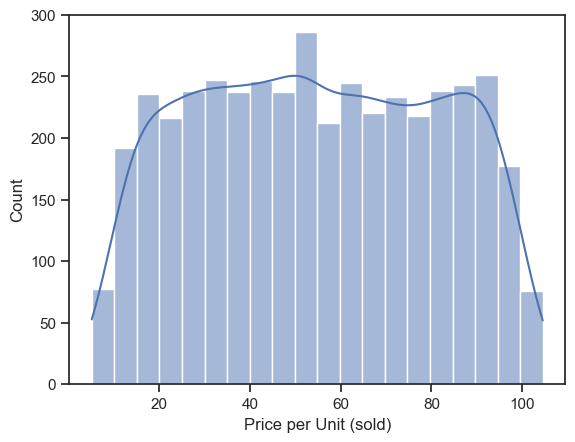

In [31]:
# Creating histogram for price per unit
# Creating histogram
histogram_2 = sns.histplot(sub['Price per Unit (sold)'], bins = 20, kde = True)

# Creating a priceflag to determine how the price per unit influence the overall sales.
### Creating categories

* Less than 30 = Low priced
* More than 30 but less than 100 = Moderately priced
* More than 100 = Highly priced

In [32]:
# Creating a Price flag

df.loc[df['Price per Unit (sold)'] < 30, 'Price flag'] = 'Low priced'
df.loc[(df['Price per Unit (sold)'] >= 30) & (df['Price per Unit (sold)'] < 100), 'Price flag'] = 'Moderately priced'
df.loc[df['Price per Unit (sold)'] >= 100, 'Price flag'] = 'Highly priced'

In [33]:
df['Price flag'].value_counts()

Moderately priced    3306
Low priced            958
Highly priced          61
Name: Price flag, dtype: int64

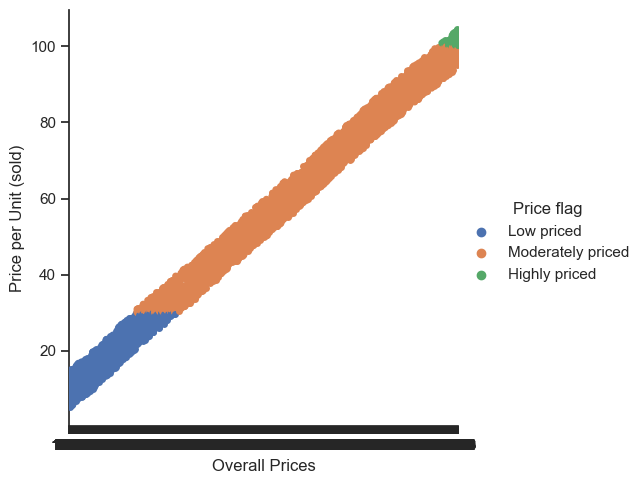

In [34]:
# Create a categorical plot in seaborn using the Sales categories created above
sns.set(style="ticks")
g_2= sns.catplot(x = "Overall Prices", y= "Price per Unit (sold)", hue= "Price flag", data=df)

From the above plot, its clear the moderately priced products have the highest sales.

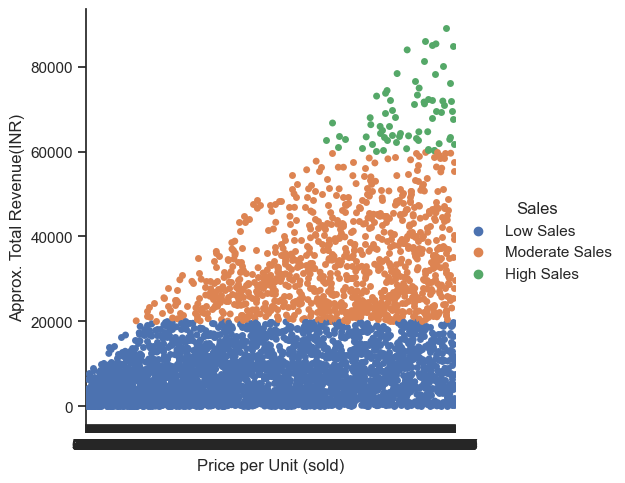

In [35]:
# Create a categorical plot in seaborn to compare the Price per product (sold) and Approx. Total revenue(INR) 
sns.set(style="ticks")
g_3= sns.catplot(x = "Price per Unit (sold)", y= "Approx. Total Revenue(INR)", hue= "Sales", data=df)

From the categorical plot, Its very clear that the moderatly priced products are mostly preferred and it generates more toward the total revenue and next is the low priced products.

In [36]:
df.head()

,States,Total Land Area (acres),Number of Cows,Farm Size per sq.km,Date recording date,Product ID,Product Name,Brand,Quantity (liters/kg),Overall Prices,...,Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales categories,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year of recording data,Sales,Price flag
0,Telangana,310.84,96,Medium,17/02/2022,5,Ice Cream,Dodla Dairy,222.40,85.72,...,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03,2022,Low Sales,Moderately priced
1,Uttar Pradesh,19.19,44,Large,01/12/2021,1,Milk,Amul,687.48,42.61,...,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10,2021,Moderate Sales,Moderately priced
2,Tamil Nadu,581.69,24,Medium,28/02/2022,4,Yogurt,Dodla Dairy,503.48,36.50,...,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83,2022,Low Sales,Moderately priced
3,Telangana,908.00,89,Small,09/06/2019,3,Cheese,Britannia Industries,823.36,26.52,...,28.92,17380.92,Rajasthan,Online,222,74.50,57.68,2019,Low Sales,Low priced
4,Maharashtra,861.95,21,Medium,14/12/2020,8,Buttermilk,Mother Dairy,147.77,83.85,...,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40,2020,Low Sales,Moderately priced


# Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

### 1. 	Does the No of cows and the farm size have any significant connection in the high and low production of dairy products?
From the heatmap, there is no correlation between the production and the no of cows.

### 2. What is the relationship between the quantities sold and the approx total revenue?

From the above analysis, it had high correlation matrix in the heat maps and after further investigating with scatterplot despite having outliers it still showed a fair strong relationship. Finally after the categorical plot its clear that the thhe products with low and moderate prices has higher sales and helps in the total revenues.

### 3. How the price per unit (sold) influence the total revenue?

From the categorical plots, its clear that the moderately priced products have a higher sales when compared to the next two categories. After the comparison, its clear that the total revenue is mostly influenced by the moderately priced products.
This may be due to India is a country with lot of middle socioeconomic status people.

### 4. Is there any relationship between the quantities in stock and quantities sold?
After analysing the correlation matrix, I don't find relationship between both.

### 5. Is there any relationship between the total value of products available and overall prices?
In the scatterplot, despite the trend line is showing upward trend there are many outliers which shows a weak to moderate relationship between the variables.

# Define any hypotheses that you can at this point. You’ll be testing these later on.

1) If the shelf life is less than it lead to decreased sales.
2) If the Low to moderately priced milk products are increased than it gradually increase the sales.
3) If the online delivery is widely implemented than the sales will eventually improvise.

# Exporting charts

In [37]:
#Exporting heatmap chart
corr.figure.savefig(os.path.join(path, '04 Analysis','Correlation matrix.png'))

In [38]:
#Exporting Scatterplot chart
scatter_1.figure.savefig(os.path.join(path, '04 Analysis','Overall prices and Price per Unit (sold).png'))

In [39]:
#Exporting Scatterplot chart
Scatter_2.figure.savefig(os.path.join(path, '04 Analysis','Total_values_of_product_and_Quantities.png'))

In [40]:
#Exporting Scatterplot chart
Scatter_3.figure.savefig(os.path.join(path, '04 Analysis','Total values of product and Approx total revenue.png'))

In [41]:
#Exporting Scatterplot chart
Scatter_4.figure.savefig(os.path.join(path, '04 Analysis','Approx total revenue and Quantities sold.png'))

In [42]:
#Exporting Scatterplot chart
Scatter_5.figure.savefig(os.path.join(path, '04 Analysis','Quantites sold and Quantities.png'))

In [43]:
#Exporting Scatterplot chart
Scatter_6.figure.savefig(os.path.join(path, '04 Analysis','Total values of products and Overall prices.png'))

In [44]:
#Exporting Scatterplot chart
Scatter_7.figure.savefig(os.path.join(path, '04 Analysis','Quantities in stock.png'))

In [45]:
#Exporting Pair Plots chart
pair_plots.figure.savefig(os.path.join(path, '04 Analysis','Pair_plots.png'))

In [46]:
#Exporting Histogram chart
histogram_1.figure.savefig(os.path.join(path, '04 Analysis','Approx. Total Revenue(INR).png'))

In [47]:
# Exporting categorical plot
g_1.figure.savefig(os.path.join(path, '04 Analysis', 'Approx. Total revenue and Quantities sold.png'))

In [48]:
#Exporting Histogram chart
histogram_2.figure.savefig(os.path.join(path, '04 Analysis','Pice per Unit (sold).png'))

In [49]:
# Exporting categorical plot
g_2.figure.savefig(os.path.join(path, '04 Analysis', 'Overall Prices and Price per Unit (sold).png'))

In [50]:
# Exporting categorical plot
g_3.figure.savefig(os.path.join(path, '04 Analysis', 'Approx. total revenue and Price per Unit (sold).png'))

# Export the file 

In [52]:
#Exporting the final data in csv format
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data','Dairy Data Cleaned.csv'))